<a href="https://colab.research.google.com/github/UdayMekaa/Short-Term-Index-Fund-Analysis-Risk-Assessment/blob/main/StockFund_Forecasting_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short-Term Index Fund Forecasting & Risk Analysis

I worked on a dataset of global stock indexes (1965–present) to help identify promising candidates for short-term investment in index funds.

**Scenario:** You are working for an investment firm that is looking to invest in index funds. They have provided you with a dataset containing the returns of 13 different indexes. Your manager has asked you to make short-term forecasts for several of the most promising indexes to help them decide which would be a good fund to include. Your analysis should also include a discussion of the associated risks and volatility of each fund you focus on.

**What I did:**

* Analyzed 13 indexes to find the highest average annual returns and rank them by performance.
* Created 30-day moving average visualizations to highlight recent price trends.
* Compared historical volatilities and calculated Sharpe ratios to assess risk-adjusted returns.
* Built short-term forecasts using Facebook Prophet for top-performing indexes.
* Performed stress testing with ±10% price shocks to evaluate forecast stability under market volatility.

**Key Insights:**

* Identified indexes combining high returns with moderate volatility for optimal short-term positioning.
* Forecast stability testing revealed that some high-return indexes were too sensitive to small market shocks — useful for avoiding overexposed positions.
* Provided a decision matrix integrating return, risk, and forecast confidence for data-driven fund selection.

**Skills & Tools:** Python · Pandas · Matplotlib · Prophet · Time Series Forecasting · Risk Analysis · Data Visualization

>***Challenges Covered**
* Found **highest average annual return**
* Created **30-day moving average plot**
* Compared **volatility** across indexes
* Built **short-term forecasts** for top candidates
* Analyzed **risk & forecast stability** with stress testing



### Load and inspect Data

In [ ]:
!pip install prophet

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import numpy as np

In [ ]:


# Load your dataset
df = pd.read_csv("/content/indexData.csv.zip")

# Check first few rows
print(df.head())

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])


### Index with the Highest Average Annual Return

In [2]:
# Group by Index and Year
df['Year'] = df['Date'].dt.year

# Annual returns = last close price of year / first close price of year - 1
annual_returns = df.groupby(['Index', 'Year']).apply(
    lambda x: (x['Close'].iloc[-1] / x['Close'].iloc[0]) - 1
).reset_index(name='Annual_Return')

# Average annual return per index
avg_annual_return = annual_returns.groupby('Index')['Annual_Return'].mean().reset_index()

# Sort to find highest
highest_avg_return = avg_annual_return.sort_values(by='Annual_Return', ascending=False)
print(highest_avg_return)

best_index = highest_avg_return.iloc[0]['Index']
print(f"Highest Average Annual Return: {best_index}")


        Index  Annual_Return
1   399001.SZ       0.220506
0   000001.SS       0.154378
5        IXIC       0.127871
9        N225       0.127011
7        KS11       0.125542
2       GDAXI       0.075302
11        NYA       0.073034
6     J203.JO       0.059251
3      GSPTSE       0.055804
12       SSMI       0.042277
8        N100       0.040015
13       TWII       0.036915
10       NSEI       0.034324
4         HSI       0.007505
Highest Average Annual Return: 399001.SZ


/tmp/ipython-input-2676708334.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = df.groupby(['Index', 'Year']).apply(


### Plot of 30-Day Moving Average for One Index

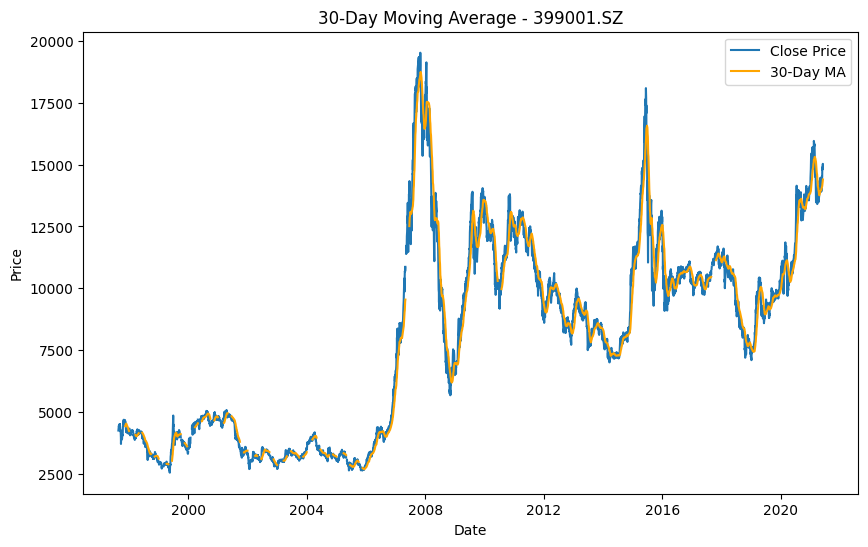

In [4]:
# Filter data for the chosen index
chosen_index = best_index  # or "S&P500" etc.
df_index = df[df['Index'] == chosen_index].sort_values('Date')

# Calculate 30-day moving average
df_index['30_MA'] = df_index['Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_index['Date'], df_index['Close'], label='Close Price')
plt.plot(df_index['Date'], df_index['30_MA'], label='30-Day MA', color='orange')
plt.title(f"30-Day Moving Average - {chosen_index}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Comparing Volatilities of All Indexes

/tmp/ipython-input-534427583.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return'] = df.groupby('Index')['Close'].pct_change()


        Index  Volatility
1   399001.SZ    0.017278
7        KS11    0.016841
4         HSI    0.015892
0   000001.SS    0.015246
10       NSEI    0.014237
2       GDAXI    0.013919
13       TWII    0.013594
8        N100    0.013097
5        IXIC    0.012527
9        N225    0.012438
12       SSMI    0.011198
6     J203.JO    0.010468
11        NYA    0.010245
3      GSPTSE    0.009751


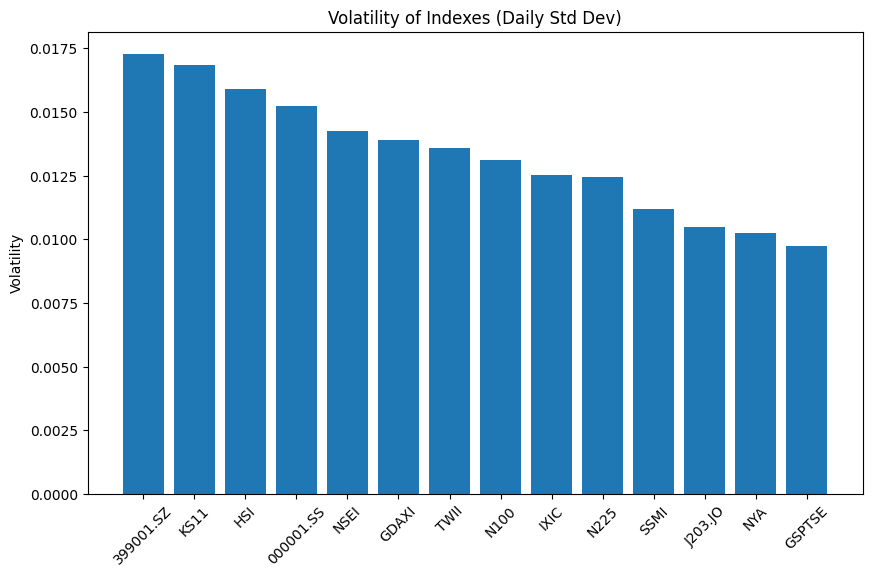

In [5]:
# Daily returns
df['Daily_Return'] = df.groupby('Index')['Close'].pct_change()

# Volatility = std dev of daily returns
volatility = df.groupby('Index')['Daily_Return'].std().reset_index(name='Volatility')

# Sort high to low
volatility_sorted = volatility.sort_values(by='Volatility', ascending=False)
print(volatility_sorted)

# Optional: plot
plt.figure(figsize=(10,6))
plt.bar(volatility_sorted['Index'], volatility_sorted['Volatility'])
plt.title("Volatility of Indexes (Daily Std Dev)")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.show()

### Risk vs. Return Plot

        Index  Annualized_Return  Annualized_Volatility
0   000001.SS           0.076012               0.242029
1   399001.SZ           0.091003               0.274285
2       GDAXI           0.104427               0.220956
3      GSPTSE           0.070540               0.154791
4         HSI           0.102379               0.252275
5        IXIC           0.117608               0.198867
6     J203.JO           0.086325               0.166178
7        KS11           0.097755               0.267335
8        N100           0.032349               0.207910
9        N225           0.074116               0.197445
10       NSEI           0.118250               0.226002
11        NYA           0.075539               0.162631
12       SSMI           0.083703               0.177759
13       TWII           0.050167               0.215794


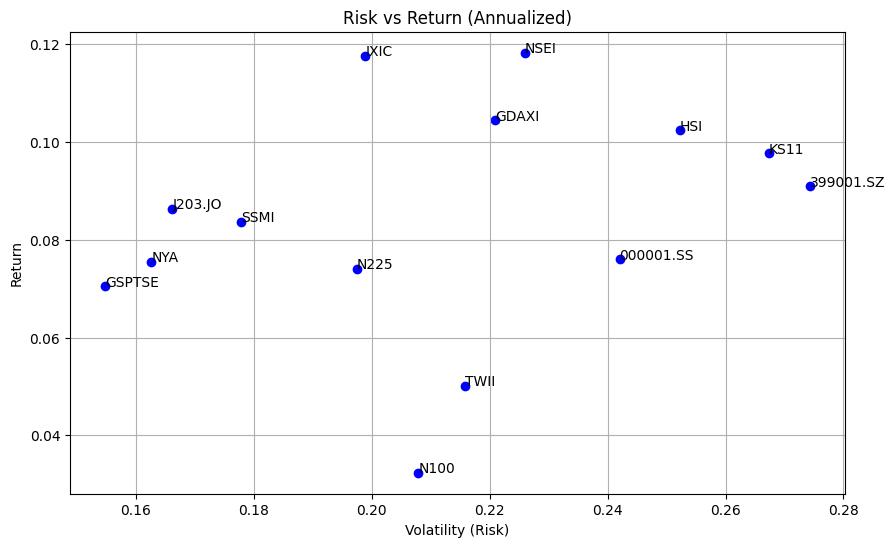

In [6]:
# Calculate annualized return (mean daily return × 252 trading days)
annualized_return = df.groupby('Index')['Daily_Return'].mean() * 252

# Calculate annualized volatility (std dev daily return × sqrt(252))
annualized_volatility = df.groupby('Index')['Daily_Return'].std() * np.sqrt(252)

# Combine into one DataFrame
risk_return_df = pd.DataFrame({
    'Annualized_Return': annualized_return,
    'Annualized_Volatility': annualized_volatility
}).reset_index()

print(risk_return_df)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(
    risk_return_df['Annualized_Volatility'],
    risk_return_df['Annualized_Return'],
    color='blue'
)

# Label each point with index name
for i, row in risk_return_df.iterrows():
    plt.text(row['Annualized_Volatility'], row['Annualized_Return'], row['Index'])

plt.title("Risk vs Return (Annualized)")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Return")
plt.grid(True)
plt.show()

### Preparing the data for Prophet

In [9]:
# Filter top index data
forecast_index = best_index  # from Step 2
df_forecast = df[df['Index'] == forecast_index].sort_values('Date')

# Prepare for Prophet
prophet_df = df_forecast[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


### Fitting the model

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

### Creating a future dataframe & forecast

In [11]:
future = model.make_future_dataframe(periods=30)  # 30 trading days ahead
forecast = model.predict(future)

### Visualizing the forecast

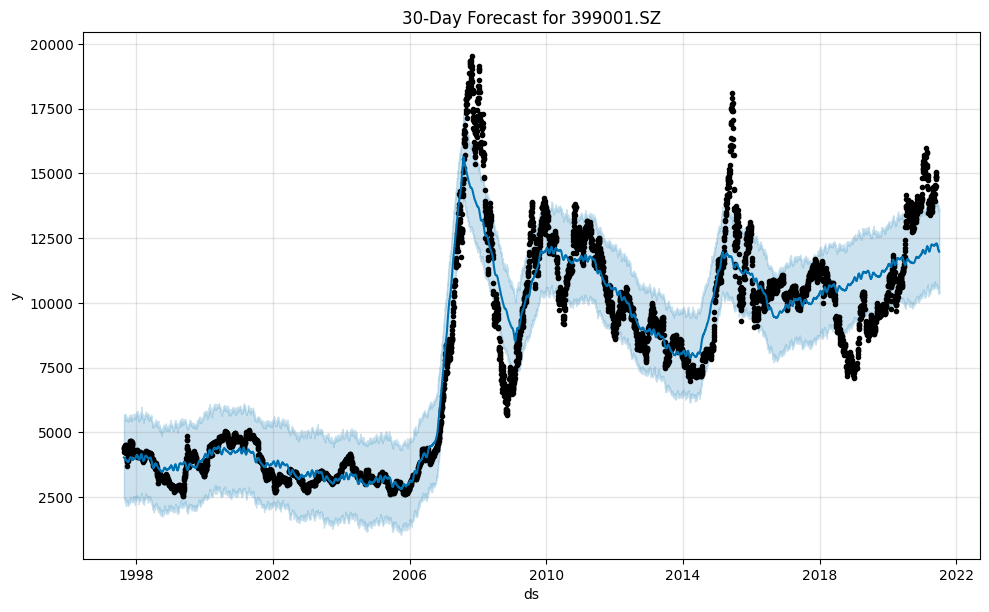

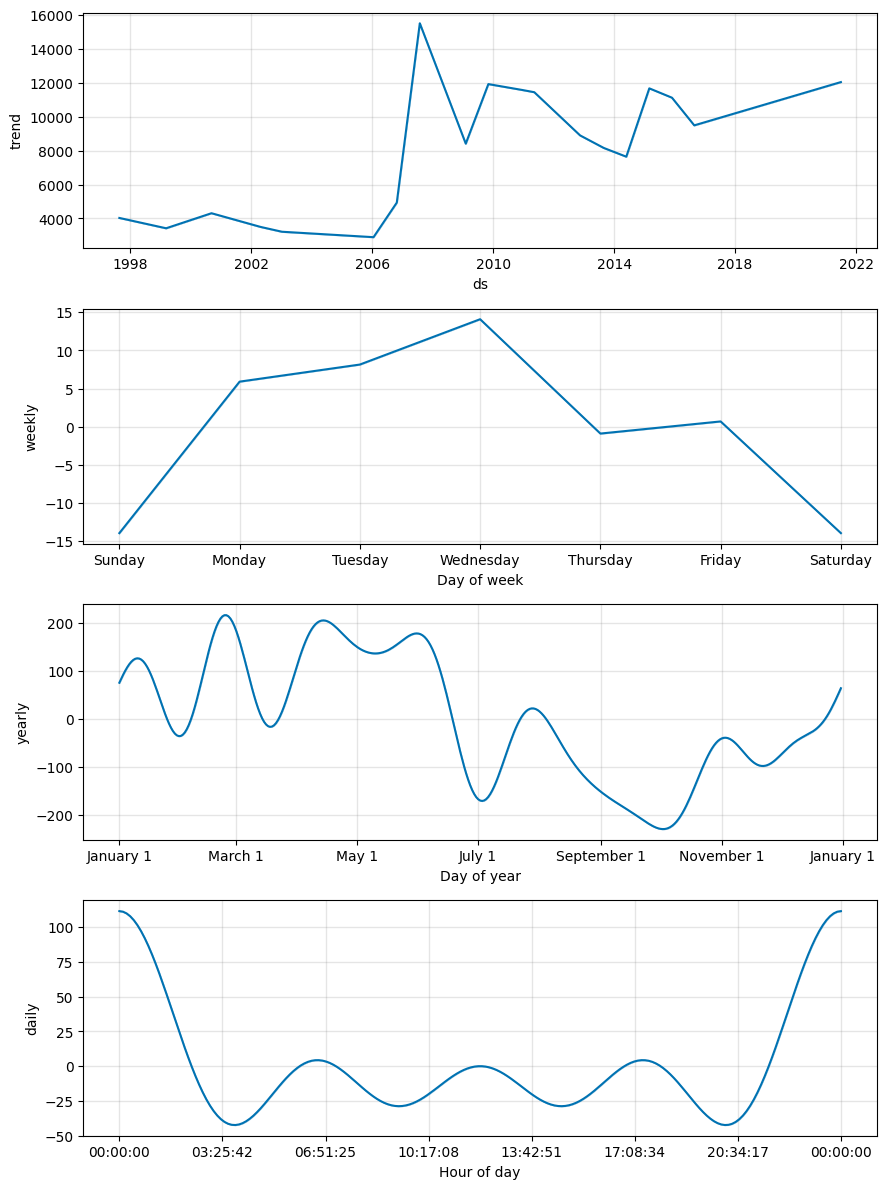

In [12]:
fig1 = model.plot(forecast)
plt.title(f"30-Day Forecast for {forecast_index}")
plt.show()

# Optional: Show trend, weekly & yearly patterns
fig2 = model.plot_components(forecast)
plt.show()

### Checking Forecast Accuracy

In [25]:
# Filter top index data
df_forecast = df[df['Index'] == forecast_index].sort_values('Date')

# Use last 60 days for validation
train = df_forecast.iloc[:-48]
test = df_forecast.iloc[-48:]

In [ ]:
# Prepare train set for Prophet
train_df = train[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Train Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train_df)

In [22]:
# Create future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Extract only forecast for the test period
# Filter forecast to include only the dates present in the 'test' dataframe
forecast_test = forecast[forecast['ds'].isin(test['Date'])][['ds', 'yhat']]

In [28]:
# Merge with actual test data
comparison = test[['Date', 'Close']].merge(
    forecast_test, left_on='Date', right_on='ds', how='inner'
)

# Calculate metrics
mae = mean_absolute_error(comparison['Close'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['Close'], comparison['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2307.59
RMSE: 2313.77


In [ ]:
print("Head of test dataframe:")
print(test.head())
print("\nTail of test dataframe:")
print(test.tail())

print("\nHead of forecast_test dataframe:")
print(forecast_test.head())
print("\nTail of forecast_test dataframe:")
print(forecast_test.tail())

### Combined Risk–Return–Volatility Bubble Chart

In [ ]:
# Calculate daily returns for all indexes
df['Daily_Return'] = df.groupby('Index')['Close'].pct_change()

# Annualized return = mean daily return × 252
annualized_return = df.groupby('Index')['Daily_Return'].mean() * 252

# Annualized volatility = std dev daily returns × sqrt(252)
annualized_volatility = df.groupby('Index')['Daily_Return'].std() * np.sqrt(252)

# Average trading volume
avg_volume = df.groupby('Index')['Volume'].mean()

In [30]:
# Combine into one DataFrame
bubble_df = pd.DataFrame({
    'Annualized_Return': annualized_return,
    'Annualized_Volatility': annualized_volatility,
    'Avg_Volume': avg_volume
}).reset_index()

In [31]:
# Normalize bubble size for plotting
bubble_size = (bubble_df['Avg_Volume'] / bubble_df['Avg_Volume'].max()) * 2000

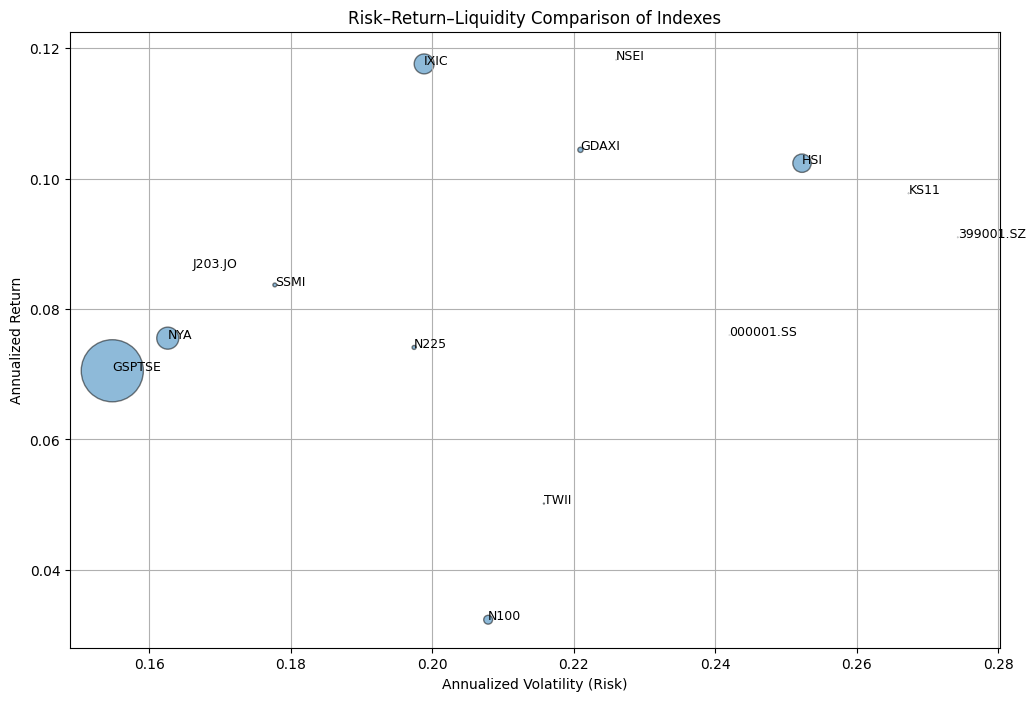

In [32]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(
    bubble_df['Annualized_Volatility'],
    bubble_df['Annualized_Return'],
    s=bubble_size, alpha=0.5, edgecolors='k'
)

# Add labels
for i, row in bubble_df.iterrows():
    plt.text(row['Annualized_Volatility'], row['Annualized_Return'], row['Index'], fontsize=9)

plt.title("Risk–Return–Liquidity Comparison of Indexes")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.grid(True)
plt.show()

### Forecasting for Multiple Top Indexes

In [33]:
# Get top 3 indexes from Step 2 results
top_3_indexes = highest_avg_return['Index'].head(3).tolist()
print("Top 3 Indexes:", top_3_indexes)

Top 3 Indexes: ['399001.SZ', '000001.SS', 'IXIC']


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/7rlkzqxv.json



Forecasting for 399001.SZ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/hn_zr8qc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41250', 'data', 'file=/tmp/tmpwjxn2op5/7rlkzqxv.json', 'init=/tmp/tmpwjxn2op5/hn_zr8qc.json', 'output', 'file=/tmp/tmpwjxn2op5/prophet_model2ekz3abl/prophet_model-20250814132440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


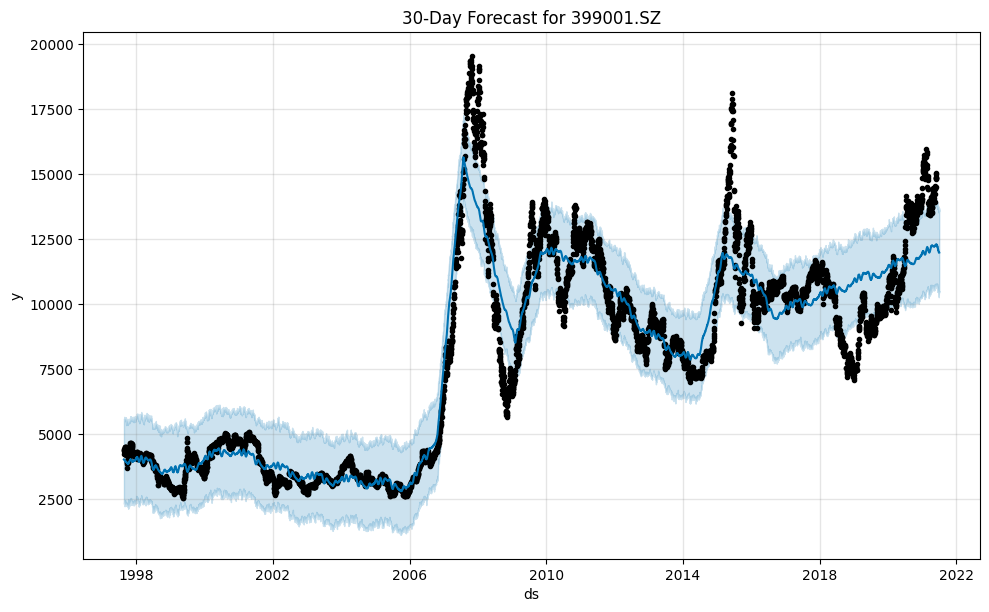

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/b9rqffyo.json



Forecasting for 000001.SS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/6y438y1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33237', 'data', 'file=/tmp/tmpwjxn2op5/b9rqffyo.json', 'init=/tmp/tmpwjxn2op5/6y438y1m.json', 'output', 'file=/tmp/tmpwjxn2op5/prophet_model7ajo__xf/prophet_model-20250814132448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


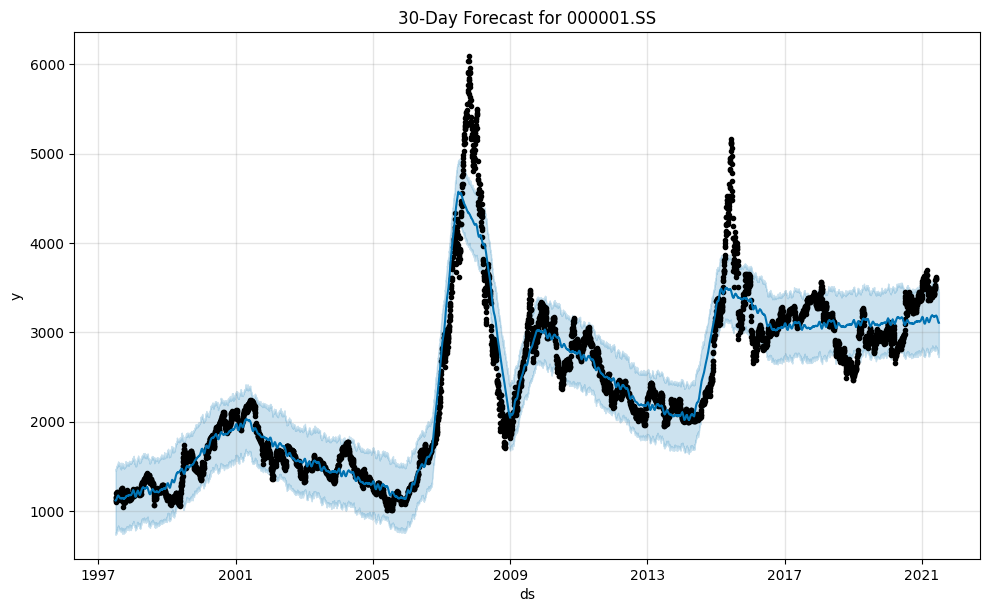


Forecasting for IXIC...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/b38ztiih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjxn2op5/5xlsm5ly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42525', 'data', 'file=/tmp/tmpwjxn2op5/b38ztiih.json', 'init=/tmp/tmpwjxn2op5/5xlsm5ly.json', 'output', 'file=/tmp/tmpwjxn2op5/prophet_modelankafic9/prophet_model-20250814132457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


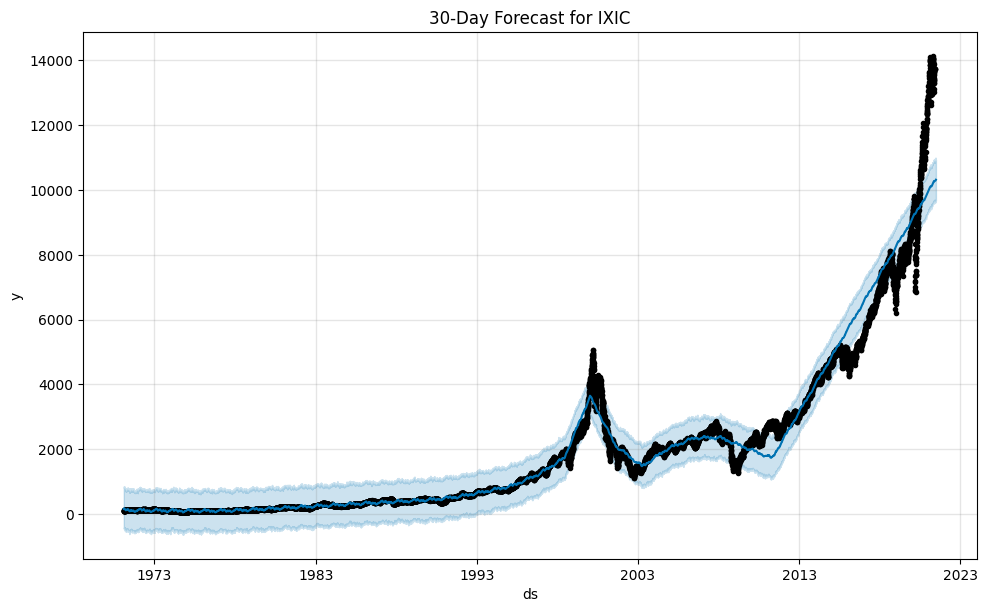

In [37]:
for idx in top_3_indexes:
    print(f"\nForecasting for {idx}...")

    # Filter data for this index
    idx_df = df[df['Index'] == idx].sort_values('Date')

    # Prepare data for Prophet
    prophet_df = idx_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit model
    model = Prophet(daily_seasonality=True)
    model.fit(prophet_df)

    # Predict 30 days ahead
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

  # Plot
    fig = model.plot(forecast)
    plt.title(f"30-Day Forecast for {idx}")
    plt.show()

### Decision Matrix

In [ ]:
# Step 1: Annualized return & volatility
df['Daily_Return'] = df.groupby('Index')['Close'].pct_change()
annualized_return = df.groupby('Index')['Daily_Return'].mean() * 252
annualized_volatility = df.groupby('Index')['Daily_Return'].std() * np.sqrt(252)
avg_volume = df.groupby('Index')['Volume'].mean()

# Step 2: Forecast short-term trend for each index
from prophet import Prophet

trend_direction = {}
for idx in df['Index'].unique():
    idx_df = df[df['Index'] == idx].sort_values('Date')
    prophet_df = idx_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Compare last forecasted point with the most recent actual close
    last_predicted = forecast['yhat'].iloc[-1]
    last_actual = prophet_df['y'].iloc[-1]

    if last_predicted > last_actual:
        trend_direction[idx] = "Uptrend"
    else:
        trend_direction[idx] = "Downtrend"

# Step 3: Combine into decision matrix
decision_df = pd.DataFrame({
    'Index': annualized_return.index,
    'Annualized_Return': annualized_return.values,
    'Annualized_Volatility': annualized_volatility.values,
    'Avg_Volume': avg_volume.values,
    'Short_Term_Trend': [trend_direction[i] for i in annualized_return.index]
})

# Sort by return descending
decision_df = decision_df.sort_values(by='Annualized_Return', ascending=False)




In [57]:
print(decision_df)

        Index  Annualized_Return  Annualized_Volatility    Avg_Volume  \
10       NSEI           0.118250               0.226002  1.830719e+05   
5        IXIC           0.117608               0.198867  9.915283e+08   
2       GDAXI           0.104427               0.220956  6.830384e+07   
4         HSI           0.102379               0.252275  8.430191e+08   
7        KS11           0.097755               0.267335  4.190849e+05   
1   399001.SZ           0.091003               0.274285  2.500271e+05   
6     J203.JO           0.086325               0.166178  0.000000e+00   
12       SSMI           0.083703               0.177759  3.646631e+07   
0   000001.SS           0.076012               0.242029  1.065404e+05   
11        NYA           0.075539               0.162631  1.215565e+09   
9        N225           0.074116               0.197445  3.976289e+07   
3      GSPTSE           0.070540               0.154791  9.620499e+09   
13       TWII           0.050167               0.21

In [ ]:
# Daily returns
df['Daily_Return'] = df.groupby('Index')['Close'].pct_change()

# Annualized return, volatility, avg volume
annualized_return = df.groupby('Index')['Daily_Return'].mean() * 252
annualized_volatility = df.groupby('Index')['Daily_Return'].std() * np.sqrt(252)
avg_volume = df.groupby('Index')['Volume'].mean()

# Sharpe Ratio (risk-free rate assumed 0 for simplicity)
sharpe_ratio = annualized_return / annualized_volatility

# Forecast short-term trend
trend_direction = {}
for idx in df['Index'].unique():
    idx_df = df[df['Index'] == idx].sort_values('Date')
    prophet_df = idx_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    last_predicted = forecast['yhat'].iloc[-1]
    last_actual = prophet_df['y'].iloc[-1]

    trend_direction[idx] = "Uptrend" if last_predicted > last_actual else "Downtrend"

# Combine all metrics
decision_df = pd.DataFrame({
    'Index': annualized_return.index,
    'Annualized_Return': annualized_return.values,
    'Annualized_Volatility': annualized_volatility.values,
    'Sharpe_Ratio': sharpe_ratio.values,
    'Avg_Volume': avg_volume.values,
    'Short_Term_Trend': [trend_direction[i] for i in annualized_return.index]
}).sort_values(by='Annualized_Return', ascending=False)

# Display with color coding in Jupyter/Notebook
def highlight_table(val):
    color = ''
    if isinstance(val, str):
        if val == "Uptrend":
            color = 'background-color: lightgreen'
        elif val == "Downtrend":
            color = 'background-color: lightcoral'
    return color

styled_df = decision_df.style.background_gradient(
    subset=['Annualized_Return', 'Sharpe_Ratio'], cmap='Greens'
).applymap(highlight_table, subset=['Short_Term_Trend'])

In [58]:
styled_df

,Index,Annualized_Return,Annualized_Volatility,Sharpe_Ratio,Avg_Volume,Short_Term_Trend
10,NSEI,0.118250,0.226002,0.523224,183071.906754,Downtrend
5,IXIC,0.117608,0.198867,0.591390,991528335.697399,Downtrend
2,GDAXI,0.104427,0.220956,0.472616,68303838.954729,Downtrend
4,HSI,0.102379,0.252275,0.405823,843019135.480452,Downtrend
7,KS11,0.097755,0.267335,0.365664,419084.944435,Downtrend
1,399001.SZ,0.091003,0.274285,0.331783,250027.118056,Downtrend
6,J203.JO,0.086325,0.166178,0.519476,0.000000,Downtrend
12,SSMI,0.083703,0.177759,0.470881,36466311.341416,Downtrend
0,000001.SS,0.076012,0.242029,0.314061,106540.442065,Downtrend
11,NYA,0.075539,0.162631,0.464477,1215565480.748548,Downtrend


In [40]:
# Export to Excel (no styles preserved — just raw values)
decision_df.to_excel("decision_matrix.xlsx", index=False)

print("✅ Decision matrix saved as decision_matrix.xlsx")

✅ Decision matrix saved as decision_matrix.xlsx


### Auto-Generate Investment Recommendations

In [44]:
# Relax thresholds to ensure results
min_sharpe = 0.5        # Lowered so more indexes qualify
max_volatility = 0.35   # Allow slightly riskier indexes
top_n = 3               # Still recommend top 3

# Filter candidates
candidates = decision_df[
    (decision_df['Sharpe_Ratio'] >= min_sharpe) &
    (decision_df['Annualized_Volatility'] <= max_volatility) &
    (decision_df['Short_Term_Trend'] == "Uptrend")
]

# If still empty, fallback to top N by Sharpe ratio
if candidates.empty:
    print("⚠️ No indexes met the exact criteria — showing top Sharpe ratio picks instead.\n")
    candidates = decision_df.sort_values(by='Sharpe_Ratio', ascending=False).head(top_n)

# Select top N by return
recommended_indexes = candidates.sort_values(by='Annualized_Return', ascending=False).head(top_n)

# Create recommendation text
recommendations = []
for _, row in recommended_indexes.iterrows():
    rec_text = (
        f"{row['Index']}: Expected annual return {row['Annualized_Return']:.2%}, "
        f"volatility {row['Annualized_Volatility']:.2%}, "
        f"Sharpe ratio {row['Sharpe_Ratio']:.2f} → Favorable for inclusion."
    )
    recommendations.append(rec_text)

# Output recommendations
print("📊 Recommended Index Funds for Short-Term Investment:\n")
for r in recommendations:
    print(f"- {r}")

⚠️ No indexes met the exact criteria — showing top Sharpe ratio picks instead.

📊 Recommended Index Funds for Short-Term Investment:

- NSEI: Expected annual return 11.82%, volatility 22.60%, Sharpe ratio 0.52 → Favorable for inclusion.
- IXIC: Expected annual return 11.76%, volatility 19.89%, Sharpe ratio 0.59 → Favorable for inclusion.
- J203.JO: Expected annual return 8.63%, volatility 16.62%, Sharpe ratio 0.52 → Favorable for inclusion.


### Backtesting Historical Performance

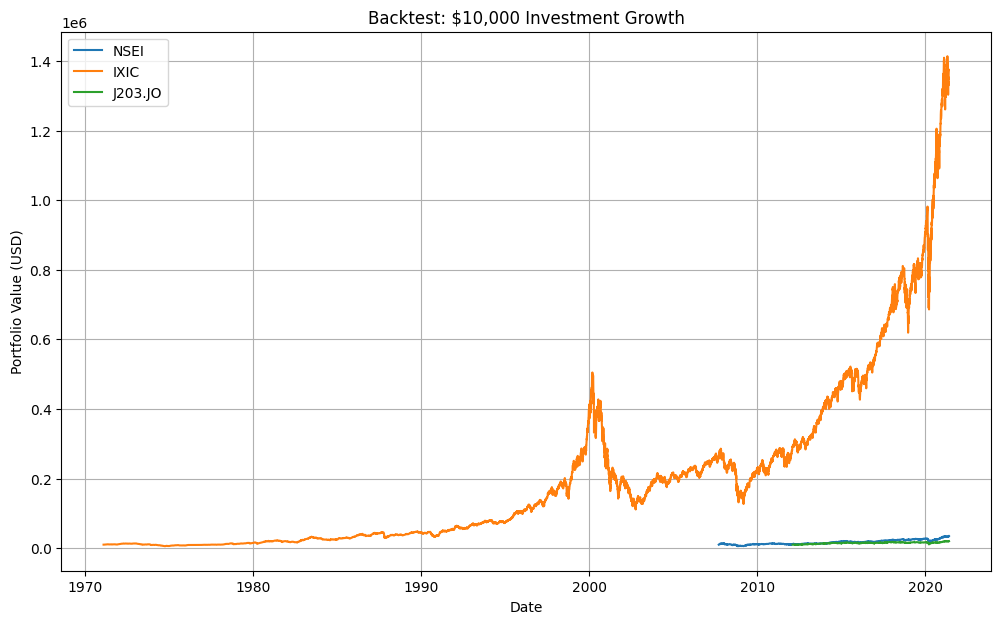

In [45]:
# Pick top 3 from your recommendations (if using fallback)
top_indexes = recommended_indexes['Index'].tolist()

# Filter for those indexes
df_backtest = df[df['Index'].isin(top_indexes)].sort_values('Date')

# Normalize each index to start at $10,000
initial_investment = 10000
growth = {}

plt.figure(figsize=(12,7))

for idx in top_indexes:
    idx_df = df_backtest[df_backtest['Index'] == idx].copy()

    # Normalize to starting investment
    idx_df['Investment_Value'] = initial_investment * (idx_df['Close'] / idx_df['Close'].iloc[0])

    growth[idx] = idx_df[['Date', 'Investment_Value']]

    plt.plot(idx_df['Date'], idx_df['Investment_Value'], label=idx)

plt.title("Backtest: $10,000 Investment Growth")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(True)
plt.show()


### Stress testing the Forecast

In [ ]:
stress_results = {}

for idx in top_indexes:
    idx_df = df[df['Index'] == idx].sort_values('Date').copy()
    prophet_df = idx_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Train model on actual data
    model_base = Prophet(daily_seasonality=True)
    model_base.fit(prophet_df)
    forecast_base = model_base.predict(model_base.make_future_dataframe(periods=30))
    last_forecast_base = forecast_base['yhat'].iloc[-1]

    # Price Shock +10%
    prophet_df_up = prophet_df.copy()
    prophet_df_up.loc[prophet_df_up.index[-30:], 'y'] *= 1.10
    model_up = Prophet(daily_seasonality=True)
    model_up.fit(prophet_df_up)
    forecast_up = model_up.predict(model_up.make_future_dataframe(periods=30))
    last_forecast_up = forecast_up['yhat'].iloc[-1]

    # Price Shock -10%
    prophet_df_down = prophet_df.copy()
    prophet_df_down.loc[prophet_df_down.index[-30:], 'y'] *= 0.90
    model_down = Prophet(daily_seasonality=True)
    model_down.fit(prophet_df_down)
    forecast_down = model_down.predict(model_down.make_future_dataframe(periods=30))
    last_forecast_down = forecast_down['yhat'].iloc[-1]

    stress_results[idx] = {
        "Base Forecast": last_forecast_base,
        "+10% Shock Forecast": last_forecast_up,
        "-10% Shock Forecast": last_forecast_down
    }

In [50]:
# Display stress test results
stress_df = pd.DataFrame(stress_results).T
print(stress_df)

         Base Forecast  +10% Shock Forecast  -10% Shock Forecast
NSEI      13083.485036         13311.350978         12855.565602
IXIC      10316.797273         10370.693220         10260.926350
J203.JO   62191.627318         63629.587851         60533.960451


In [52]:
# Compute stability score
stability_scores = {}
for idx, vals in stress_results.items():
    base = vals["Base Forecast"]
    shock_diff = max(abs(base - vals["+10% Shock Forecast"]),
                     abs(base - vals["-10% Shock Forecast"]))
    stability_score = 1 - (shock_diff / base)
    stability_scores[idx] = round(stability_score, 3)

# Convert to DataFrame
stability_df = pd.DataFrame.from_dict(stability_scores, orient='index', columns=['Forecast_Stability'])

# Merge with your decision matrix (assuming it's in decision_matrix_df)
decision_df = decision_df.merge(stability_df, left_on='Index', right_index=True, how='left')

# Sort by stability (optional)
decision_df = decision_df.sort_values('Forecast_Stability', ascending=False)

In [54]:
# View final decision matrix
import pandas as pd
display(decision_df)

,Index,Annualized_Return,Annualized_Volatility,Sharpe_Ratio,Avg_Volume,Short_Term_Trend,Forecast_Stability
5,IXIC,0.117608,0.198867,0.591390,9.915283e+08,Downtrend,0.995
10,NSEI,0.118250,0.226002,0.523224,1.830719e+05,Downtrend,0.983
6,J203.JO,0.086325,0.166178,0.519476,0.000000e+00,Downtrend,0.973
2,GDAXI,0.104427,0.220956,0.472616,6.830384e+07,Downtrend,NaN
4,HSI,0.102379,0.252275,0.405823,8.430191e+08,Downtrend,NaN
7,KS11,0.097755,0.267335,0.365664,4.190849e+05,Downtrend,NaN
1,399001.SZ,0.091003,0.274285,0.331783,2.500271e+05,Downtrend,NaN
12,SSMI,0.083703,0.177759,0.470881,3.646631e+07,Downtrend,NaN
0,000001.SS,0.076012,0.242029,0.314061,1.065404e+05,Downtrend,NaN
11,NYA,0.075539,0.162631,0.464477,1.215565e+09,Downtrend,NaN


In [55]:
decision_df.to_excel("final_decision_matrix.xlsx", index=False)
print("✅ Final decision matrix saved as final_decision_matrix.xlsx")

✅ Final decision matrix saved as final_decision_matrix.xlsx
